In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('Datasets/titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].mean()

In [11]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_age)

In [12]:
X_train.head()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


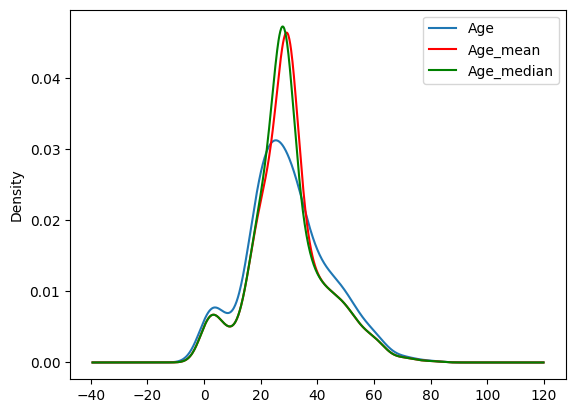

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')

X_train['Age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

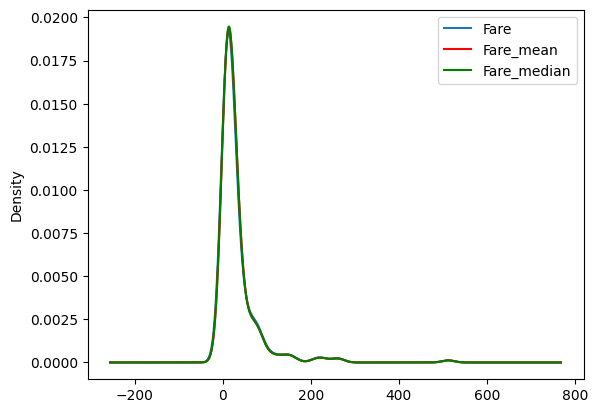

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [20]:
import seaborn as sns

In [25]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.008529,70.916562
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.659866,17.661074
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.026540,56.952682
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.538695,60.458269
Fare_mean,71.008529,2761.031435,17.659866,57.026540,60.538695,2621.670511,2621.888037
Fare_median,70.916562,2761.031435,17.661074,56.952682,60.458269,2621.888037,2622.213561


In [26]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088692,0.088561
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204992,0.204985
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085711,0.085591
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.090894,0.090764
Fare_mean,0.088692,1.000000,0.204992,0.085711,0.090894,1.000000,0.999979
Fare_median,0.088561,1.000000,0.204985,0.085591,0.090764,0.999979,1.000000


<Axes: >

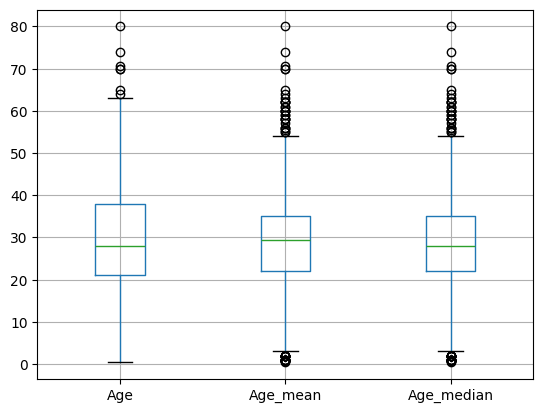

In [27]:
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

# Using Sklearn

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [44]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [45]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [46]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])